In [4]:
import numpy as np
import matplotlib.pyplot as plt 
#import plotly.graph_objects as go

In [ ]:
#Constants definition

R0 = 0.2477 #major axis
rm = 0.09
zm = 0.09
nr = 10
nphi = 100
nz = 100

dr = 2*rm/nr
dphi = 2*np.pi/nphi
dz = 2*zm/nz


In [31]:
class Particle(object):
    
    def __init__(self, name, mass, charge, init_pos, init_vel):
        self.name = name        
        self.mass = mass
        self.charge = charge
        self.pos = init_pos
        self.vel = init_vel
        self.KE = [0.5*self.mass*np.linalg.norm(self.vel)**2]
        
    def calc_KE(self):
        self.KE.append(0.5*self.mass*np.linalg.norm(self.vel)**2)
    

In [32]:
def updateVelocityBoris(Particle, dt, E, B):
    qm = Particle.charge/Particle.mass
    v_minus = Particle.vel + qm*E*dt/2
    
    t = qm*B*dt/2
    v_prime = v_minus + np.cross(v_minus,t)
    s = 2*t/(1+np.dot(t,t))
    v_plus = v_minus + np.cross(v_prime ,s)
    Particle.vel = v_plus + qm*E*dt 
    Particle.calc_KE()
    
    

In [83]:
E = np.array([1,0,0])
B = np.array([0.03,0,0])
init_pos = np.array([0,0,0])
init_vel = np.array([1,0,1])
dt = 1e-12
m_e= 9.10938356e-31
q_e = -1.60217662e-19

electron = Particle('e-',m_e,q_e,
                    init_pos, init_vel)

In [84]:
nSteps = 10000
positions = np.zeros((nSteps, 3))
velocities = np.zeros((nSteps, 3))
time = dt*np.linspace(0,nSteps, nSteps)
positions[0] = electron.vel
velocities[0] = electron.pos


for i in range(1,nSteps):
    updateVelocityBoris(electron, dt, E, B)
    velocities[i] = electron.vel
    positions[i] = positions[i-1] + velocities[i]*dt

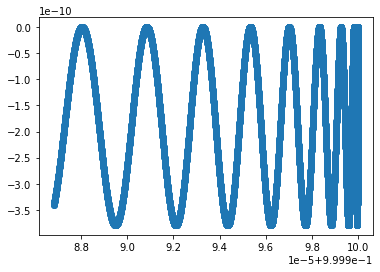

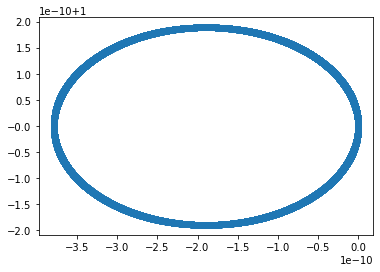

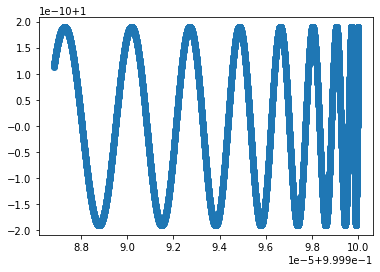

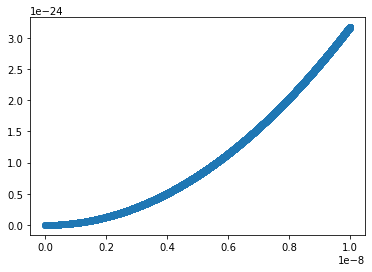

In [85]:
plt.scatter(positions[:,0], positions[:,1])
plt.show()
plt.scatter(positions[:,1], positions[:,2])
plt.show()
plt.scatter(positions[:,0], positions[:,2])
plt.show()
plt.scatter(time, electron.KE)